In [42]:
!pip install autoviz

In [43]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (205, 25)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  7
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  4
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    25 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 36


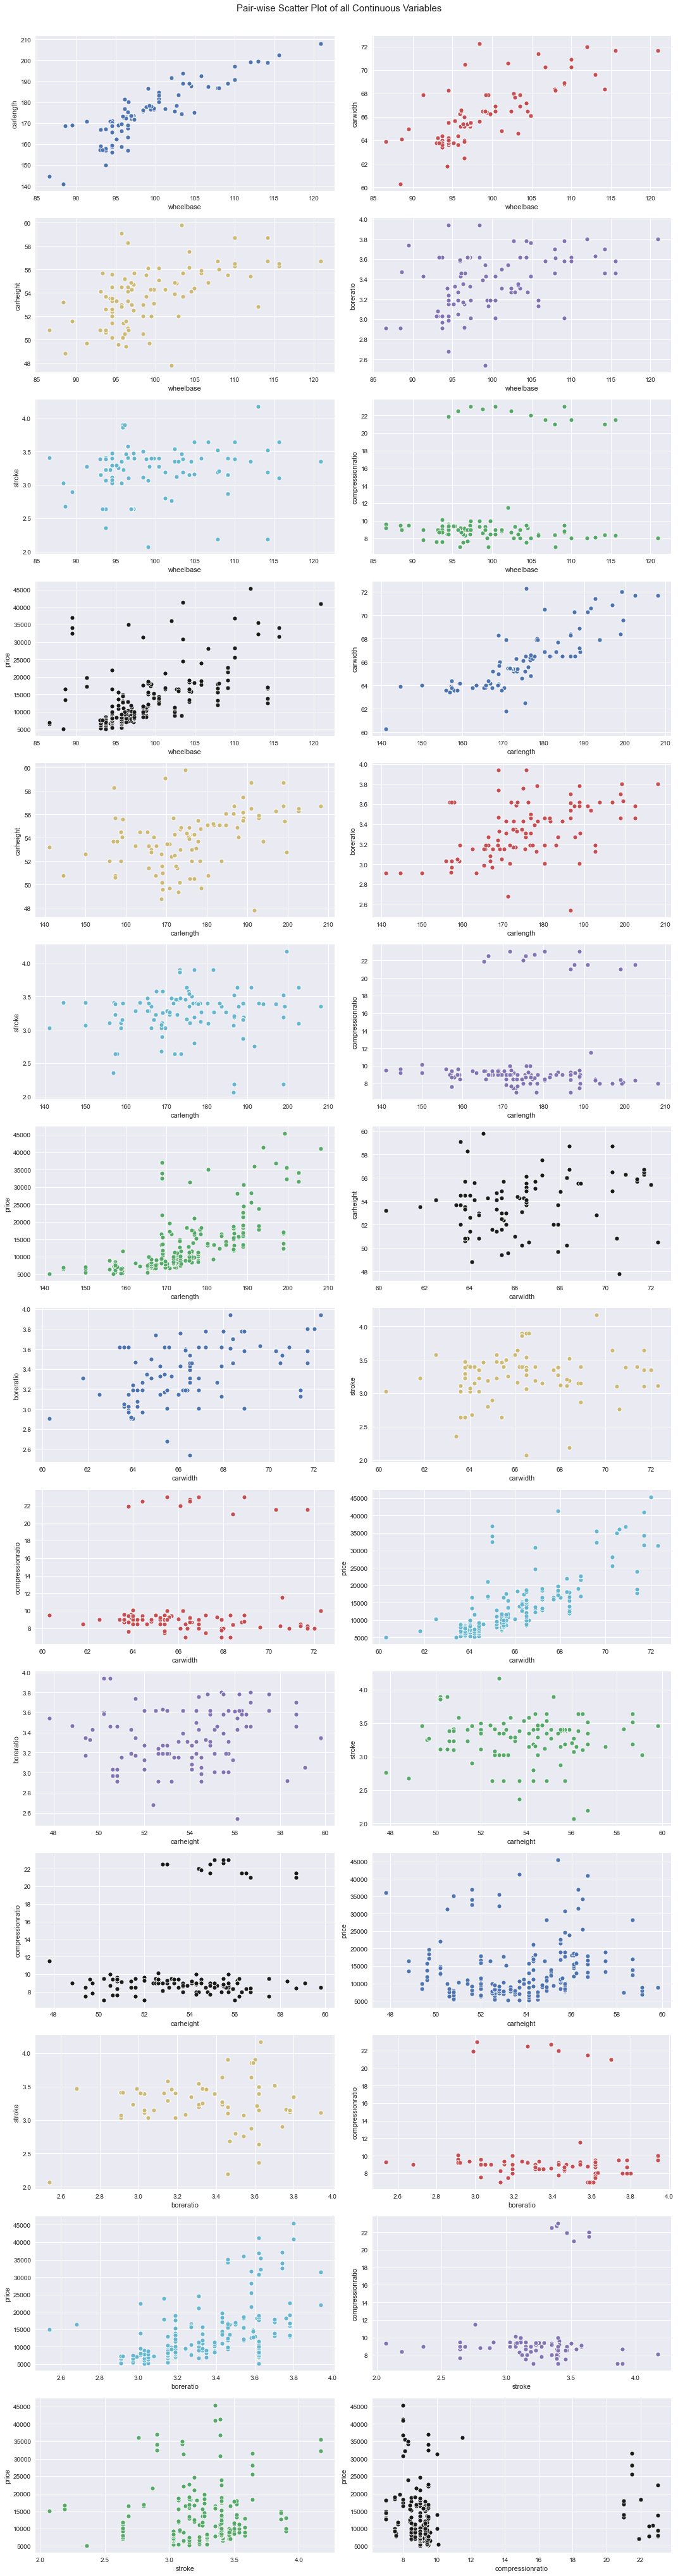

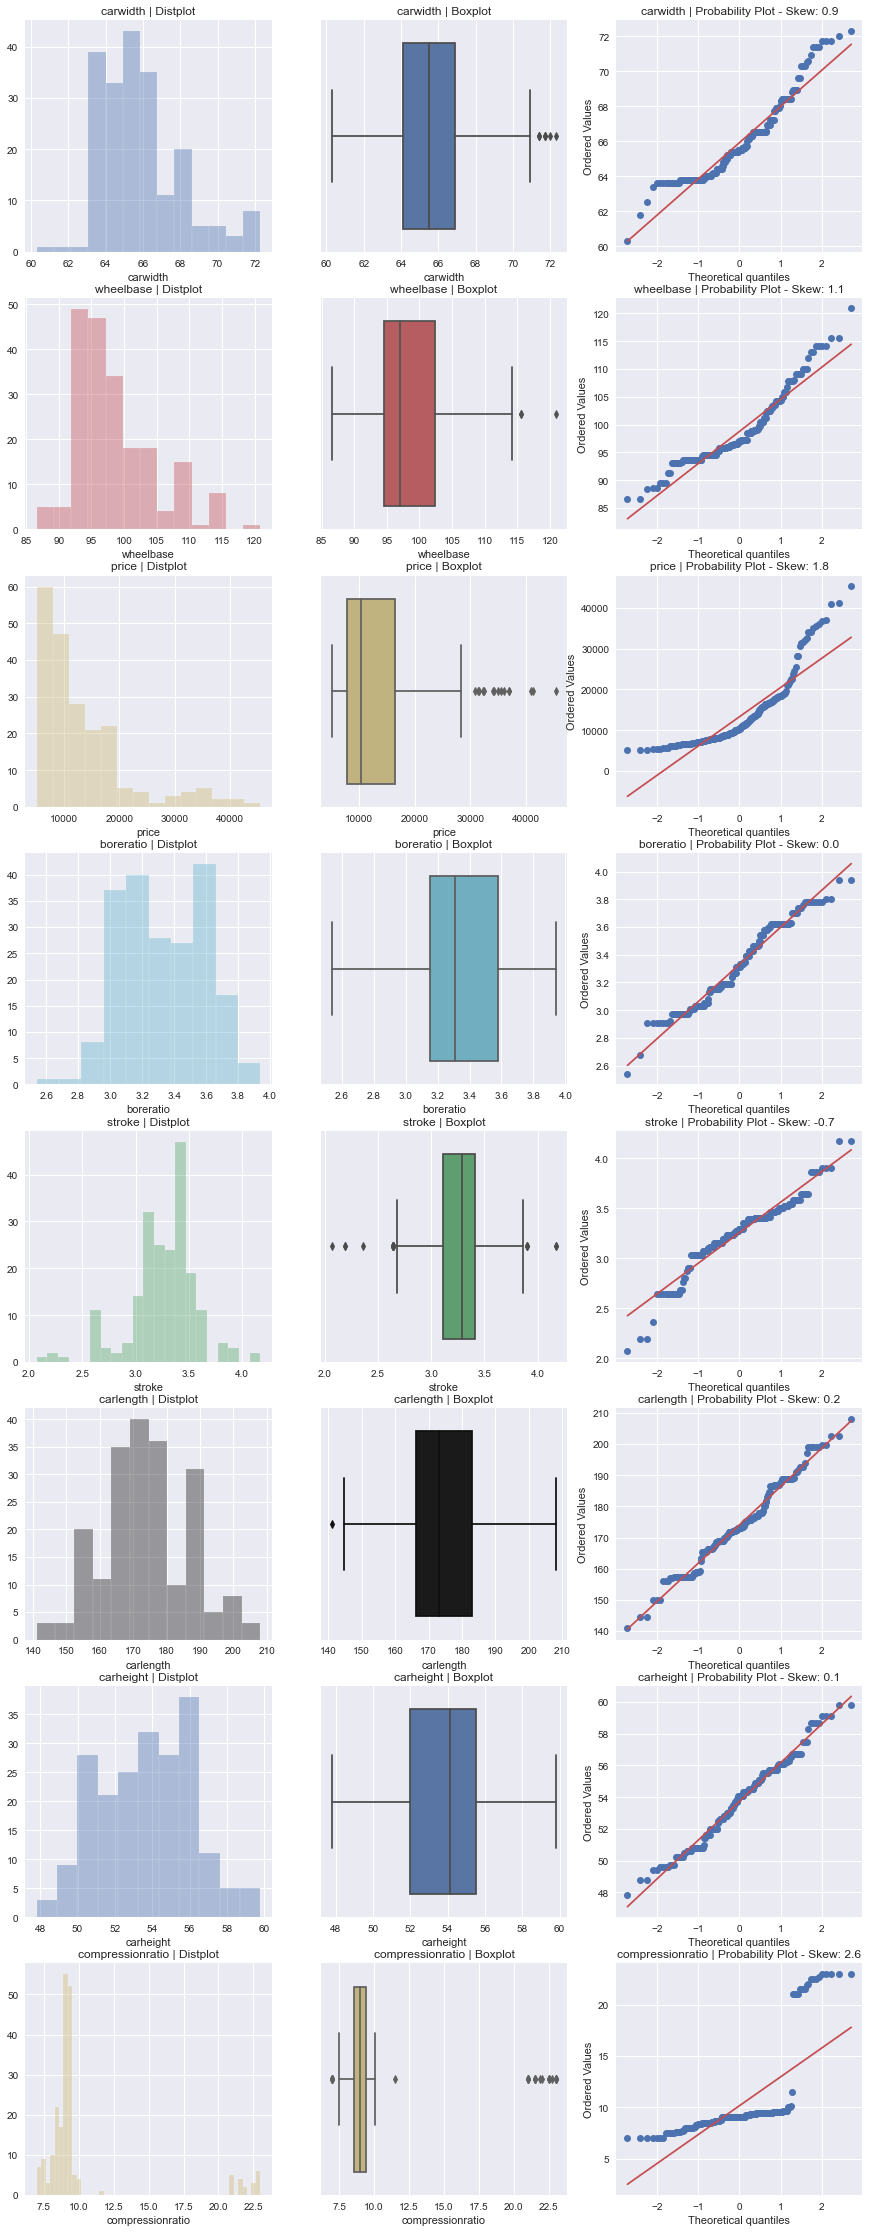

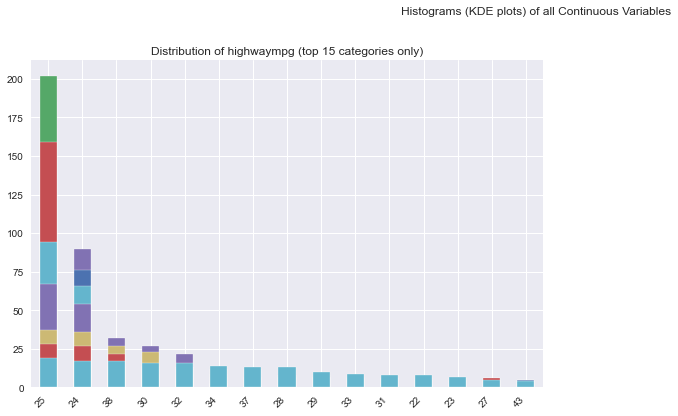

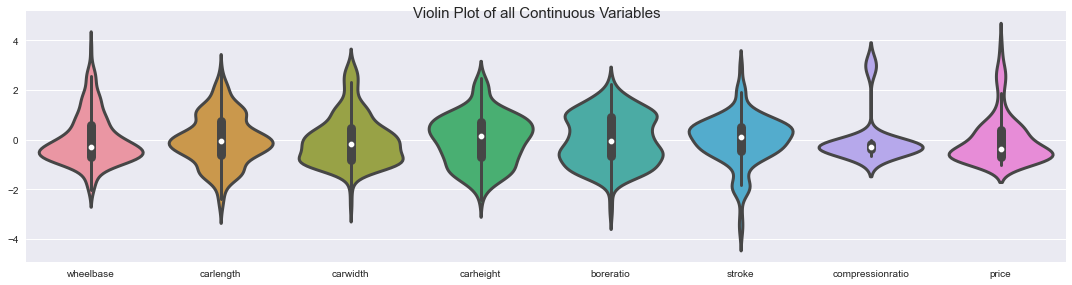

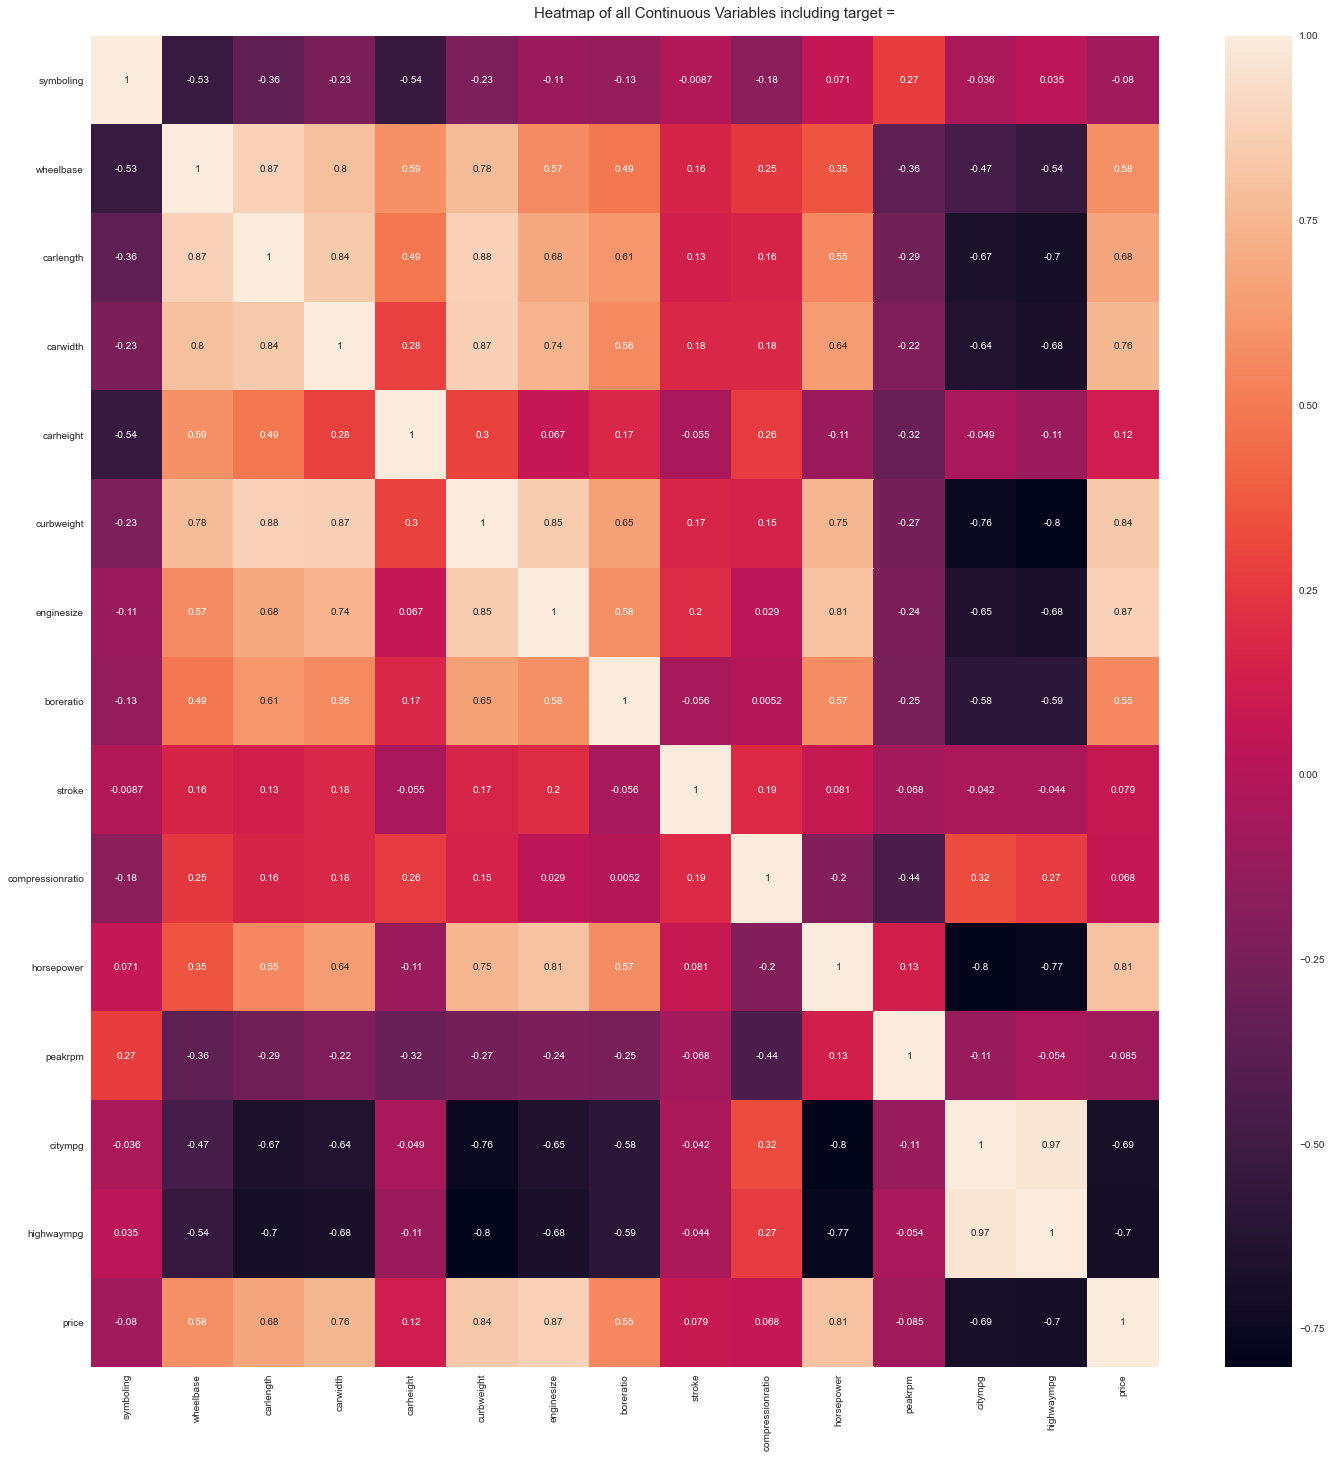

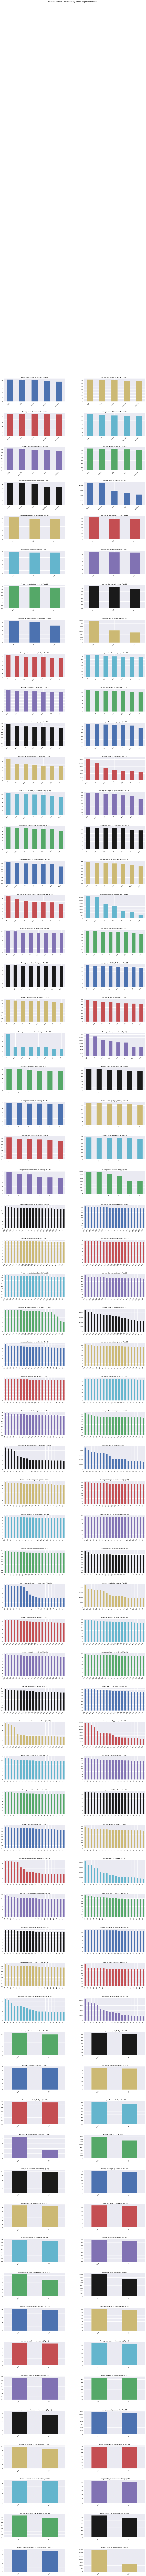

Time to run AutoViz (in seconds) = 107.777

 ###################### VISUALIZATION Completed ########################


In [44]:
filename = "AutoData.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

In [45]:
!pip install sweetviz

In [47]:
import sweetviz

In [49]:
my_report = sweetviz.analyze([data, "Automobile Price Prediction"], target_feat = "price")

                                             |                                             | [  0%]   00:00 ->…

In [50]:
my_report.show_html("AutoMobile_Report.html")

Report AutoMobile_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [1]:
# math and data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

#### Reading the Data

In [2]:
data = pd.read_csv('AutoData.csv')

In [3]:
data1 = data.copy()

In [4]:
data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [6]:
data.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
print("Rows : ",data.shape[0])
print("Columns : ",data.shape[1])

Rows :  205
Columns :  25


In [8]:
data.sample(50)

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
153,0,toyota corona hardtop,gas,std,four,wagon,fwd,front,95.7,169.7,63.6,59.1,2280,ohc,four,92,2bbl,3.05,3.03,9.00,62,4800,31,37,6918.0
67,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.50,123,4350,22,25,25552.0
134,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2707,ohc,four,121,mpfi,2.54,2.07,9.30,110,5250,21,28,15040.0
22,1,dodge challenger se,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1876,ohc,four,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6377.0
98,2,nissan clipper,gas,std,two,hardtop,fwd,front,95.1,162.4,63.8,53.3,2008,ohc,four,97,2bbl,3.15,3.29,9.40,69,5200,31,37,8249.0
146,0,subaru trezia,gas,std,four,wagon,fwd,front,97.0,173.5,65.4,53.0,2290,ohcf,four,108,2bbl,3.62,2.64,9.00,82,4800,28,32,7463.0
34,1,honda civic cvcc,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1956,ohc,four,92,1bbl,2.91,3.41,9.20,76,6000,30,34,7129.0
182,2,vokswagen rabbit,diesel,std,two,sedan,fwd,front,97.3,171.7,65.5,55.7,2261,ohc,four,97,idi,3.01,3.40,23.00,52,4800,37,46,7775.0
86,1,mitsubishi pajero,gas,std,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2405,ohc,four,122,2bbl,3.35,3.46,8.50,88,5000,25,32,8189.0
85,1,mitsubishi montero,gas,std,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2365,ohc,four,122,2bbl,3.35,3.46,8.50,88,5000,25,32,6989.0


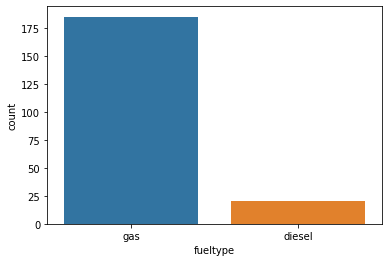

In [9]:
sns.countplot(x='fueltype',data=data)
plt.draw()

In [10]:
# list of object datatype
obj_dtypes_col = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [11]:
obj_dtypes_col

['make',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [12]:
numerical_col = [feature for feature in data.columns if data[feature].dtypes != 'O']

In [13]:
numerical_col

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

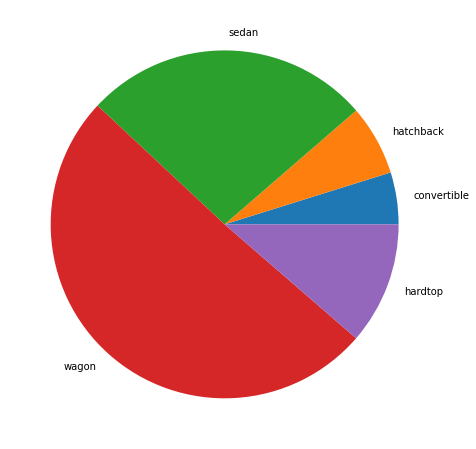

In [14]:
plt.figure(figsize=(12,8))
plt.pie(data.groupby('carbody')['price'].sum(), labels = data['carbody'].unique())
plt.draw()

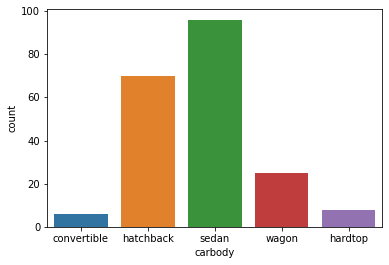

In [15]:
sns.countplot(x='carbody',data=data)
plt.draw()

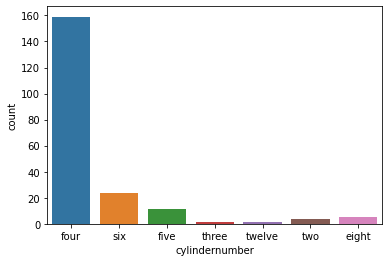

In [16]:
sns.countplot(x='cylindernumber',data=data)
plt.draw()

In [17]:
data.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [18]:
data.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [19]:
sedan_data = data[data.carbody=='sedan']

In [20]:
sedan_data.price.sum()

1377050.0

In [21]:
for car in data.carbody.unique():
    print(f"{car} : \t {data[data.carbody==car]['price'].sum()}")

convertible : 	 131343.0
hatchback : 	 726365.667
sedan : 	 1377050.0
wagon : 	 309299.0
hardtop : 	 177668.0


In [22]:
label_carbody = list(data.carbody.unique())

label_carbody = ['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']

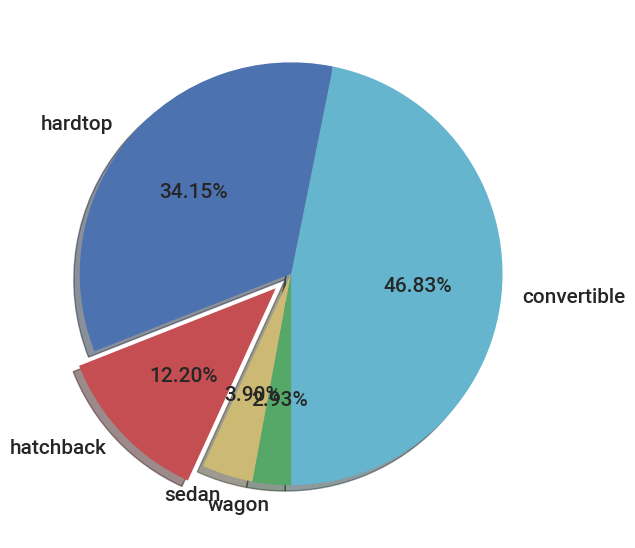

In [56]:
explode = [0,0,0.1,0,0] # To slice the perticuler section
colors = ["c", 'b','r','y','g'] # Color of each section
textprops = {"fontsize":15} # Font size of text in pie chart
plt.figure(figsize=(10,7))
plt.pie(data.carbody.value_counts(), # Values
        labels =label_carbody, # Labels for each sections
        explode = explode, # To slice the perticuler section
        colors =colors, # Color of each section
        autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.0, # Radius to increase or decrease the size of pie chart 
       startangle = 270, # Start angle of first section
        textprops =textprops) 
 
plt.show() # To show pie chart only

In [24]:
309299.0/data.price.sum()

0.1136407698065038

In [25]:
new_data=data.groupby(['carbody'])['price'].sum()

In [26]:
new_data

carbody
convertible     131343.000
hardtop         177668.000
hatchback       726365.667
sedan          1377050.000
wagon           309299.000
Name: price, dtype: float64

In [27]:
data.shape

(205, 25)

In [28]:
list(obj_dtypes_col)

['make',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [29]:
for feature in obj_dtypes_col:
    if feature == 'make':
        pass
    else:
        print(f"----------{feature}----------")
        print(data[feature].value_counts())
        print("--"*20)

----------fueltype----------
gas       185
diesel     20
Name: fueltype, dtype: int64
----------------------------------------
----------aspiration----------
std      168
turbo     37
Name: aspiration, dtype: int64
----------------------------------------
----------doornumber----------
four    115
two      90
Name: doornumber, dtype: int64
----------------------------------------
----------carbody----------
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
----------------------------------------
----------drivewheel----------
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
----------------------------------------
----------enginelocation----------
front    202
rear       3
Name: enginelocation, dtype: int64
----------------------------------------
----------enginetype----------
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
----

In [30]:
data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
##we see that in make column car company and model given,splitting the company and model
data['car_company'] = data.make.str.split(' ').str.get(0).str.upper()

In [32]:
data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI


In [33]:
data.car_company.unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAXDA', 'MAZDA', 'BUICK', 'MERCURY',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE',
       'PORCSHCE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA', 'TOYOUTA',
       'VOKSWAGEN', 'VOLKSWAGEN', 'VW', 'VOLVO'], dtype=object)

In [34]:
data['car_company'] = data['car_company'].replace(['VOKSWAGEN','VW'],'VOLKSWAGEN')
data['car_company'] = data['car_company'].replace(['MAXDA'],'MAZDA')
data['car_company'] = data['car_company'].replace(['PORCSHCE'],'PORSCHE')
data['car_company'] = data['car_company'].replace(['TOYOUTA'],'TOYOTA')

In [35]:
data.drop('make',axis=1, inplace=True)

In [36]:
data.to_csv('Automobile_Data.csv')

In [37]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI


In [38]:
data.style.background_gradient()

In [39]:
company_pivot = data.pivot_table(index=['car_company'], values=['price'], aggfunc='mean').reset_index()

In [40]:
company_pivot.sort_values(by='price',ascending=False).style.background_gradient()

,car_company,price
8,JAGUAR,34600.000000
3,BUICK,33647.000000
15,PORSCHE,31400.500000
2,BMW,26118.750000
21,VOLVO,18063.181818
1,AUDI,17859.166714
10,MERCURY,16503.000000
0,ALFA-ROMERO,15498.333333
13,PEUGEOT,15489.090909
17,SAAB,15223.333333


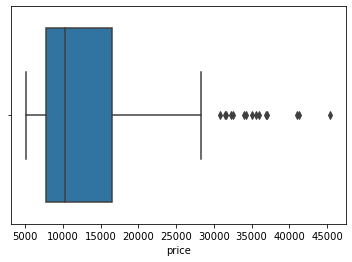

In [41]:
sns.boxplot('price',data=data)